## DEMO
### Loss Functions

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [34]:
x = np.linspace(-3,3,1000)
y_p = np.where(x < 0, -x, 0)
y01 = np.where(x < 0, 1, 0)
ylog = np.log(1 + np.exp(-x))
yq = (x-1)**2
yhinge = np.where(x < 1, 1-x, 0)

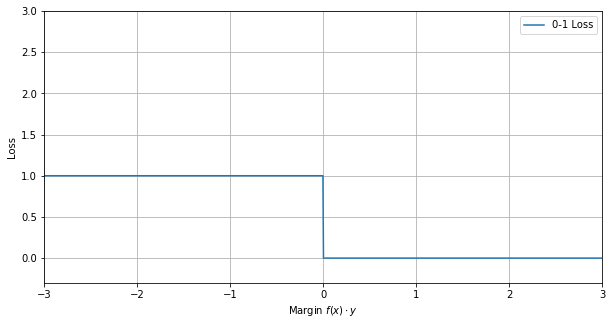

In [36]:
plt.figure(figsize=(10,5))
# plt.plot(x,y_p,label='Perceptron Loss')
plt.plot(x,y01,label='0-1 Loss')
# plt.plot(x,ylog,label='Logistic Loss')
# plt.plot(x,yhinge,label='Hinge Loss')
# plt.plot(x,yq,label='Quadratic Loss')

plt.legend()
plt.xlim([-3,3])
plt.ylim([-.3,3])
plt.xlabel(r"Margin $f(x) \cdot y$")
plt.ylabel(r"Loss")
plt.grid();


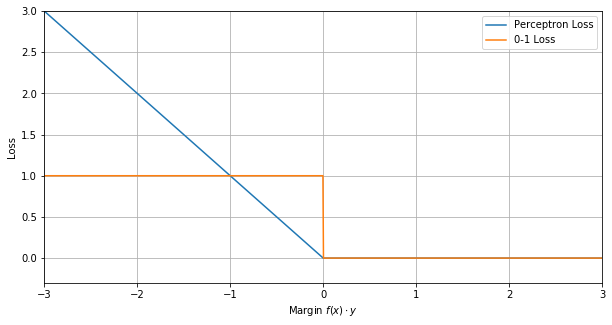

In [37]:
plt.figure(figsize=(10,5))
plt.plot(x,y_p,label='Perceptron Loss')
plt.plot(x,y01,label='0-1 Loss')
# plt.plot(x,ylog,label='Logistic Loss')
# plt.plot(x,yhinge,label='Hinge Loss')
# plt.plot(x,yq,label='Quadratic Loss')

plt.legend()
plt.xlim([-3,3])
plt.ylim([-.3,3])
plt.xlabel(r"Margin $f(x) \cdot y$")
plt.ylabel(r"Loss")
plt.grid();


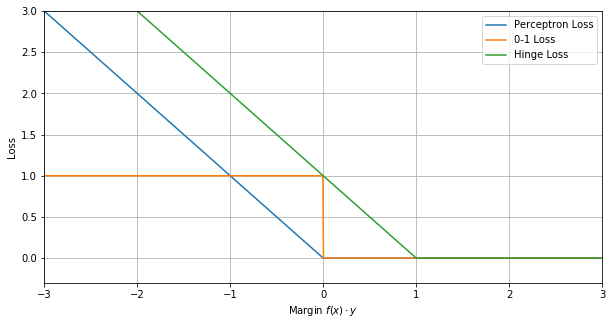

In [38]:
plt.figure(figsize=(10,5))
plt.plot(x,y_p,label='Perceptron Loss')
plt.plot(x,y01,label='0-1 Loss')
# plt.plot(x,ylog,label='Logistic Loss')
plt.plot(x,yhinge,label='Hinge Loss')
# plt.plot(x,yq,label='Quadratic Loss')

plt.legend()
plt.xlim([-3,3])
plt.ylim([-.3,3])
plt.xlabel(r"Margin $f(x) \cdot y$")
plt.ylabel(r"Loss")
plt.grid();


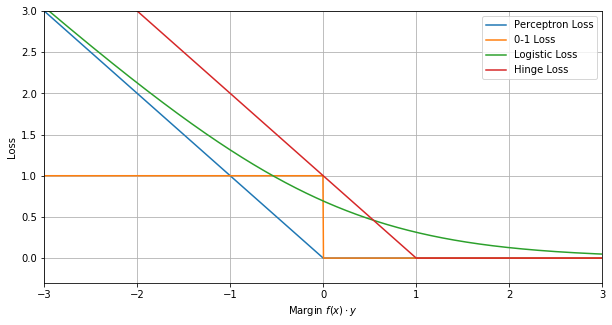

In [39]:
plt.figure(figsize=(10,5))
plt.plot(x,y_p,label='Perceptron Loss')
plt.plot(x,y01,label='0-1 Loss')
plt.plot(x,ylog,label='Logistic Loss')
plt.plot(x,yhinge,label='Hinge Loss')
# plt.plot(x,yq,label='Quadratic Loss')

plt.legend()
plt.xlim([-3,3])
plt.ylim([-.3,3])
plt.xlabel(r"Margin $f(x) \cdot y$")
plt.ylabel(r"Loss")
plt.grid();


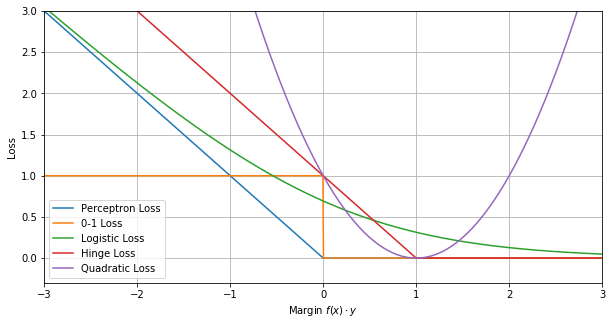

In [35]:
plt.figure(figsize=(10,5))
plt.plot(x,y_p,label='Perceptron Loss')
plt.plot(x,y01,label='0-1 Loss')
plt.plot(x,ylog,label='Logistic Loss')
plt.plot(x,yhinge,label='Hinge Loss')
plt.plot(x,yq,label='Quadratic Loss')

plt.legend()
plt.xlim([-3,3])
plt.ylim([-.3,3])
plt.xlabel(r"Margin $f(x) \cdot y$")
plt.ylabel(r"Loss")
plt.grid();


### Logistic Regression

In [42]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [43]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Petal Width (cm)

In [47]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [49]:
log_reg = LogisticRegression(solver="sag", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

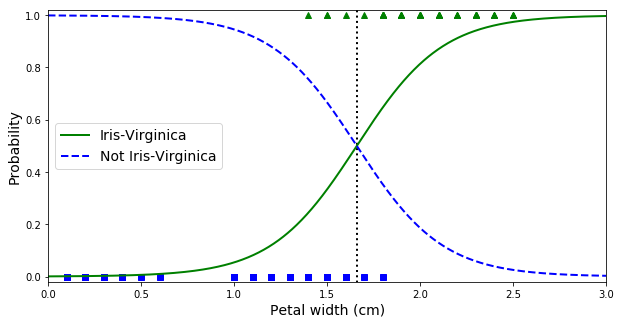

In [56]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show();

In [58]:
decision_boundary

array([1.66066066])

In [59]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Petal Width (cm) and Length (cm)

In [60]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

In [68]:
log_reg = LogisticRegression(solver="sag", C=10**1, random_state=42)
log_reg.fit(X, y)

C:\Users\policast\Programs\Anaconda3.7\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

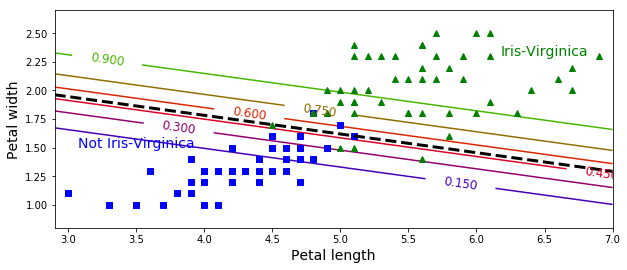

In [67]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()